<a href="https://colab.research.google.com/github/gyurmey/tensorflow/blob/main/april.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
469/469 [==============================] - 17s 23ms/step - loss: 0.1535 - accuracy: 0.9588 - val_loss: 0.0819 - val_accuracy: 0.9745
Epoch 2/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0489 - accuracy: 0.9857 - val_loss: 0.1113 - val_accuracy: 0.9698
Epoch 3/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0395 - accuracy: 0.9885 - val_loss: 0.1401 - val_accuracy: 0.9699
Epoch 4/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0342 - accuracy: 0.9905 - val_loss: 0.0406 - val_accuracy: 0.9905
Epoch 5/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0226 - accuracy: 0.9937 - val_loss: 0.0692 - val_accuracy: 0.9825
Epoch 6/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0227 - accuracy: 0.9929 - val_loss: 0.0484 - val_accuracy: 0.9884
Epoch 7/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0200 - accuracy: 0.9941 - val_loss: 0.0362 - val_accuracy:

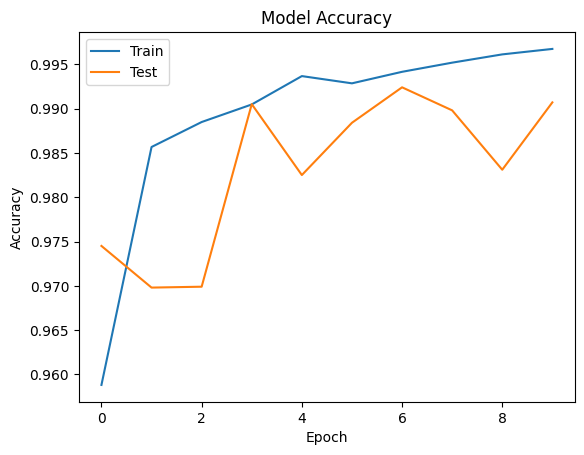

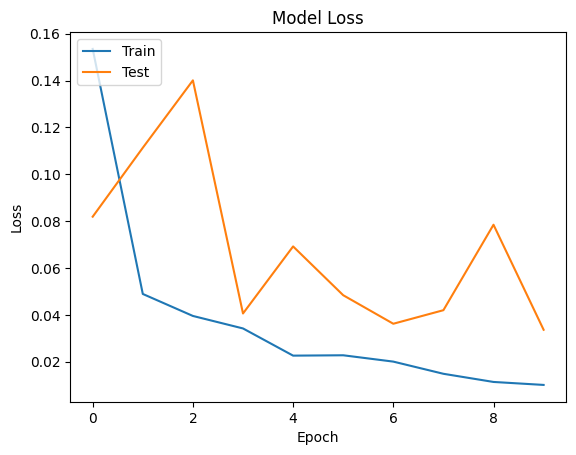

In [6]:
# ResNet Architecture with MNIST hand written digit dataset


import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras
from keras.datasets import mnist
from keras.utils import to_categorical

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape and normalize the images
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

from keras.layers import Input, Conv2D, BatchNormalization, Activation, Flatten, Dense, Add
from keras.models import Model

# Define the ResNet block
def resnet_block(input_data, filters):
    x = Conv2D(filters, kernel_size=(3,3), strides=(1,1), padding='same')(input_data)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, kernel_size=(3,3), strides=(1,1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Add()([x, input_data])
    x = Activation('relu')(x)
    return x

# Define the ResNet model
inputs = Input(shape=(28, 28, 1))
x = Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = resnet_block(x, 32)
x = Conv2D(64, kernel_size=(3,3), strides=(2,2), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = resnet_block(x, 64)
x = Conv2D(128, kernel_size=(3,3), strides=(2,2), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = resnet_block(x, 128)
x = Flatten()(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs, outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Generate predictions on the test set
y_pred = model.predict(X_test)

# Convert predictions from one-hot encoding to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Generate the classification report
print(classification_report(y_test_classes, y_pred_classes))

# Generate the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_true, y_pred_classes))


plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

     

Epoch 1/20
469/469 [==============================] - 17s 15ms/step - loss: 0.1049 - accuracy: 0.9669 - val_loss: 0.4908 - val_accuracy: 0.8608
Epoch 2/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0445 - accuracy: 0.9859 - val_loss: 0.0398 - val_accuracy: 0.9877
Epoch 3/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0312 - accuracy: 0.9900 - val_loss: 0.1495 - val_accuracy: 0.9553
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0265 - accuracy: 0.9916 - val_loss: 0.0549 - val_accuracy: 0.9835
Epoch 5/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0229 - accuracy: 0.9926 - val_loss: 0.0408 - val_accuracy: 0.9864
Epoch 6/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0177 - accuracy: 0.9942 - val_loss: 0.0491 - val_accuracy: 0.9863
Epoch 7/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0183 - accuracy: 0.9941 - val_loss: 0.0508 - val_accuracy: 0.986

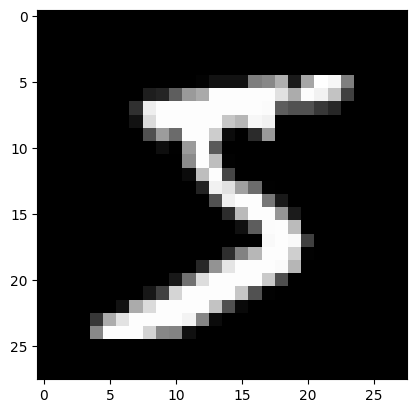

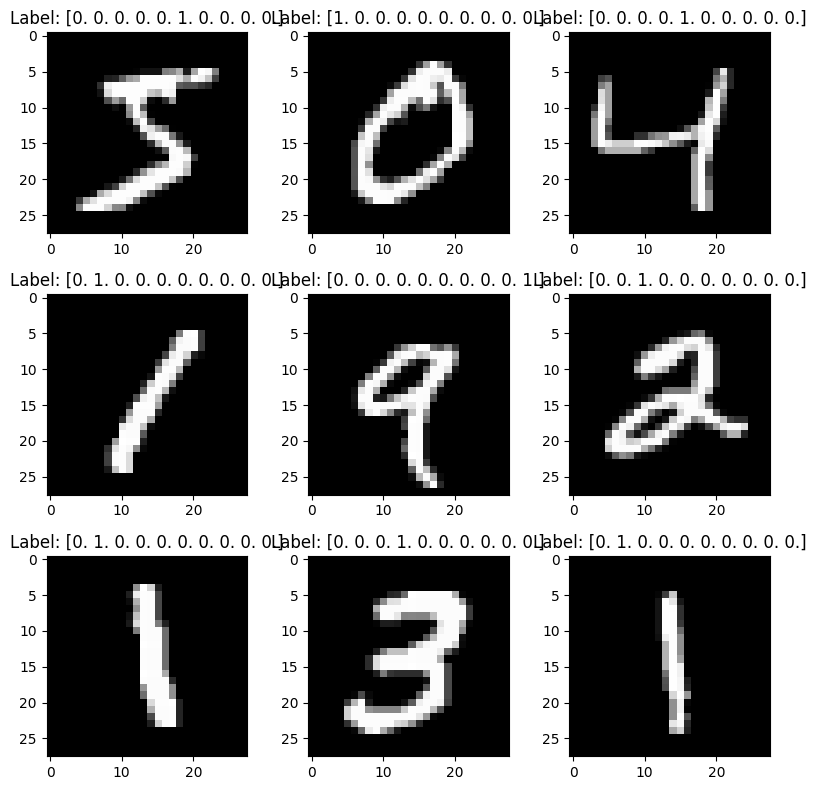

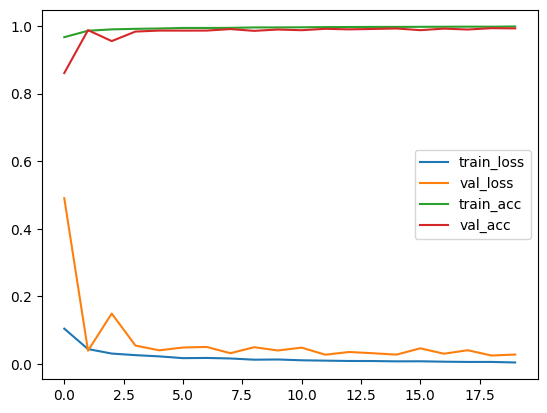

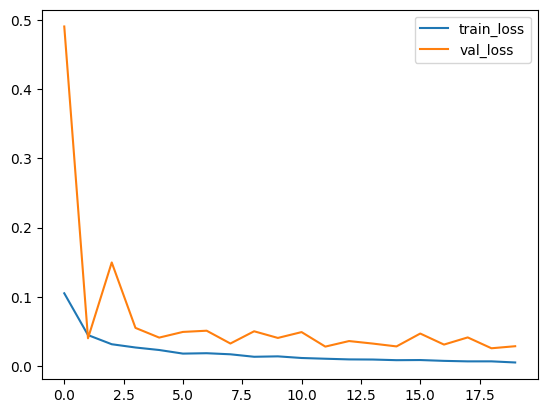

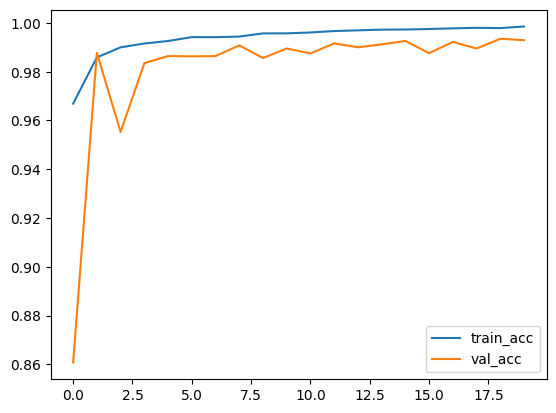

313/313 [==============================] - 1s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      1.00      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      1.00      0.99      1028
           8       1.00      0.99      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Confusion Matrix:
[[ 978    0    0    0    0    0    1    1    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   1    0 1026    0    1    0    0   

In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Activation, Add
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPooling2D


# Load the MNIST dataset and preprocess it
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Define the ResNet block
def res_block(x, filters, downsample=False):
    shortcut = x
    stride = 1
    if downsample:
        stride = 2
        shortcut = Conv2D(filters, 1, strides=stride)(shortcut)
        shortcut = BatchNormalization()(shortcut)
    x = Conv2D(filters, 3, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, 3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

# Define the ResNet model
inputs = Input(shape=(28,28,1))
x = Conv2D(64, 7, strides=2, padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(x)

x = res_block(x, 64)
x = res_block(x, 64)

x = res_block(x, 128, downsample=True)
x = res_block(x, 128)

x = res_block(x, 256, downsample=True)
x = res_block(x, 256)

x = GlobalAveragePooling2D()(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs, outputs)

# Compile the model
model.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train.reshape(-1,28,28,1), y_train,
                    validation_data=(x_test.reshape(-1,28,28,1), y_test),
                    batch_size=128,
                    epochs=20)

# Plot a single image
plt.imshow(x_train[0], cmap='gray')
plt.show()

# Plot a batch of images
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8,8))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title("Label: {}".format(y_train[i]))
plt.tight_layout()
plt.show()


# Plot the loss and accuracy curves
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

# Plot the loss curve
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

# Evaluate the model on the test set
y_pred = model.predict(x_test.reshape(-1,28,28,1))
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print the evaluation metrics
print('Classification Report:')
print(classification_report(y_true, y_pred_classes))

print('Confusion Matrix:')
print(confusion_matrix(y_true, y_pred_classes))


Epoch 1/10
469/469 [==============================] - 17s 16ms/step - loss: 0.1057 - accuracy: 0.9675 - val_loss: 0.1083 - val_accuracy: 0.9654
Epoch 2/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0455 - accuracy: 0.9858 - val_loss: 0.0638 - val_accuracy: 0.9801
Epoch 3/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0315 - accuracy: 0.9905 - val_loss: 0.1132 - val_accuracy: 0.9656
Epoch 4/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0274 - accuracy: 0.9912 - val_loss: 0.1021 - val_accuracy: 0.9691
Epoch 5/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0210 - accuracy: 0.9938 - val_loss: 0.0495 - val_accuracy: 0.9851
Epoch 6/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0198 - accuracy: 0.9938 - val_loss: 0.0379 - val_accuracy: 0.9893
Epoch 7/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0177 - accuracy: 0.9943 - val_loss: 0.0299 - val_accuracy: 0.990

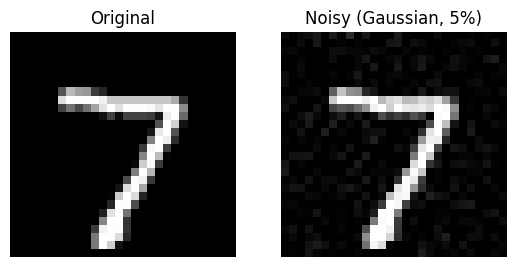

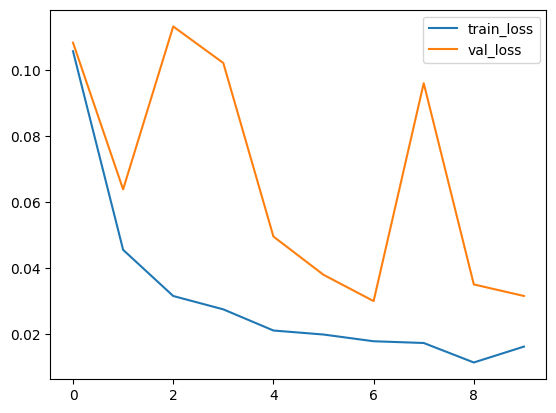

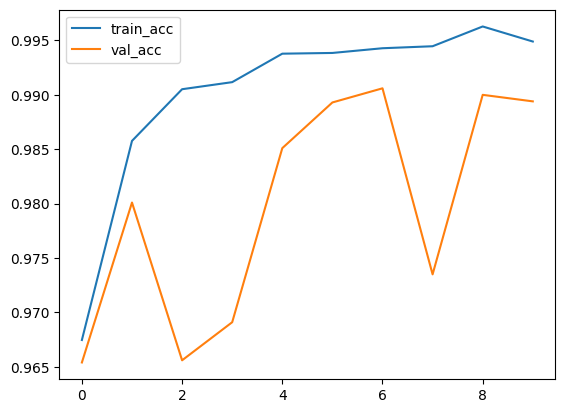

In [8]:
# Gaussian noise _5% and Epochs = 10

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Activation, Add, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset and preprocess it
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Generate noisy images
noise_scale = 0.05
x_train_noisy = x_train + noise_scale * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_scale * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the noisy images to the [0, 1] range
x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

# Define the ResNet block
def res_block(x, filters, downsample=False):
    shortcut = x
    stride = 1
    if downsample:
        stride = 2
        shortcut = Conv2D(filters, 1, strides=stride)(shortcut)
        shortcut = BatchNormalization()(shortcut)
    x = Conv2D(filters, 3, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, 3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

# Define the ResNet model
inputs = Input(shape=(28,28,1))
x = Conv2D(64, 7, strides=2, padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(x)

x = res_block(x, 64)
x = res_block(x, 64)

x = res_block(x, 128, downsample=True)
x = res_block(x, 128)

x = res_block(x, 256, downsample=True)
x = res_block(x, 256)

x = GlobalAveragePooling2D()(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs, outputs)

# Compile the model
model.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train_noisy.reshape(-1,28,28,1), y_train,
                    validation_data=(x_test_noisy.reshape(-1,28,28,1), y_test),
                    batch_size=128,
                    epochs=10)

# Evaluate the model on the test set
y_pred = model.predict(x_test.reshape(-1,28,28,1))
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print the evaluation metrics
print('Classification Report:')
print(classification_report(y_true, y_pred_classes))

print('Confusion Matrix:')
print(confusion_matrix(y_true, y_pred_classes))


# Plot a single image with and without noise
img_index = 0

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(x_test[img_index], cmap='gray')
plt.title('Original')
plt.axis('off')

# Plot the noisy image
noise_level = 0.05
plt.subplot(1, 2, 2)
plt.imshow(x_test_noisy[img_index], cmap='gray')
plt.title(f'Noisy (Gaussian, {noise_level*100:.0f}%)')
plt.axis('off')

plt.show()

# Plot the loss curve
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()







Epoch 1/20
469/469 [==============================] - 19s 18ms/step - loss: 0.1026 - accuracy: 0.9681 - val_loss: 0.8144 - val_accuracy: 0.7839
Epoch 2/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0437 - accuracy: 0.9862 - val_loss: 0.0522 - val_accuracy: 0.9824
Epoch 3/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0331 - accuracy: 0.9897 - val_loss: 0.0418 - val_accuracy: 0.9863
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0268 - accuracy: 0.9914 - val_loss: 0.0290 - val_accuracy: 0.9908
Epoch 5/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0233 - accuracy: 0.9922 - val_loss: 0.0476 - val_accuracy: 0.9862
Epoch 6/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0177 - accuracy: 0.9944 - val_loss: 0.0804 - val_accuracy: 0.9776
Epoch 7/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0189 - accuracy: 0.9938 - val_loss: 0.0478 - val_accuracy: 0.986

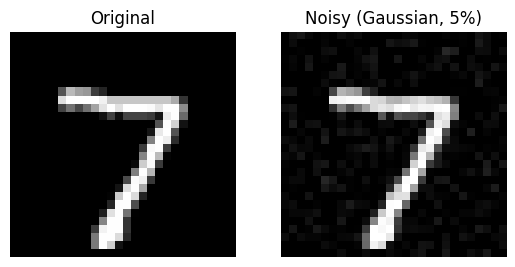

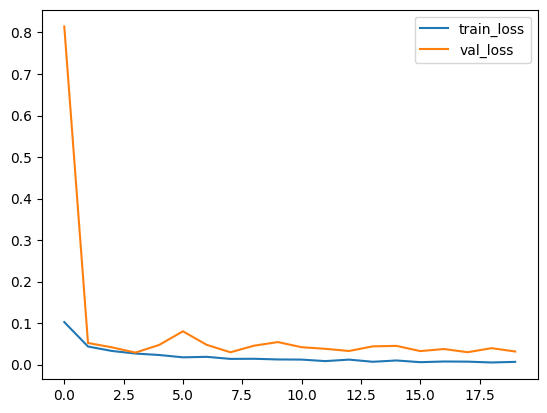

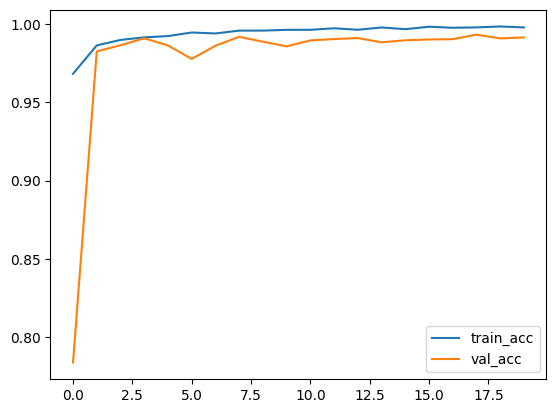

In [9]:
# Gaussian Noise = 5% with Epochs = 20

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Activation, Add, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset and preprocess it
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Generate noisy images
noise_scale = 0.05
x_train_noisy = x_train + noise_scale * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_scale * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the noisy images to the [0, 1] range
x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

# Define the ResNet block
def res_block(x, filters, downsample=False):
    shortcut = x
    stride = 1
    if downsample:
        stride = 2
        shortcut = Conv2D(filters, 1, strides=stride)(shortcut)
        shortcut = BatchNormalization()(shortcut)
    x = Conv2D(filters, 3, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, 3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

# Define the ResNet model
inputs = Input(shape=(28,28,1))
x = Conv2D(64, 7, strides=2, padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(x)

x = res_block(x, 64)
x = res_block(x, 64)

x = res_block(x, 128, downsample=True)
x = res_block(x, 128)

x = res_block(x, 256, downsample=True)
x = res_block(x, 256)

x = GlobalAveragePooling2D()(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs, outputs)

# Compile the model
model.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train_noisy.reshape(-1,28,28,1), y_train,
                    validation_data=(x_test_noisy.reshape(-1,28,28,1), y_test),
                    batch_size=128,
                    epochs=20)

# Evaluate the model on the test set
y_pred = model.predict(x_test.reshape(-1,28,28,1))
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print the evaluation metrics
print('Classification Report:')
print(classification_report(y_true, y_pred_classes))

print('Confusion Matrix:')
print(confusion_matrix(y_true, y_pred_classes))


# Plot a single image with and without noise
img_index = 0

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(x_test[img_index], cmap='gray')
plt.title('Original')
plt.axis('off')

# Plot the noisy image
noise_level = 0.05
plt.subplot(1, 2, 2)
plt.imshow(x_test_noisy[img_index], cmap='gray')
plt.title(f'Noisy (Gaussian, {noise_level*100:.0f}%)')
plt.axis('off')

plt.show()

# Plot the loss curve
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()


Epoch 1/10
469/469 [==============================] - 19s 16ms/step - loss: 0.1102 - accuracy: 0.9656 - val_loss: 1.2114 - val_accuracy: 0.7178
Epoch 2/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0437 - accuracy: 0.9866 - val_loss: 0.0358 - val_accuracy: 0.9876
Epoch 3/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0338 - accuracy: 0.9898 - val_loss: 0.0626 - val_accuracy: 0.9807
Epoch 4/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0258 - accuracy: 0.9918 - val_loss: 0.0459 - val_accuracy: 0.9856
Epoch 5/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0206 - accuracy: 0.9935 - val_loss: 0.0609 - val_accuracy: 0.9829
Epoch 6/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0176 - accuracy: 0.9942 - val_loss: 0.0559 - val_accuracy: 0.9835
Epoch 7/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0181 - accuracy: 0.9941 - val_loss: 0.0291 - val_accuracy: 0.991

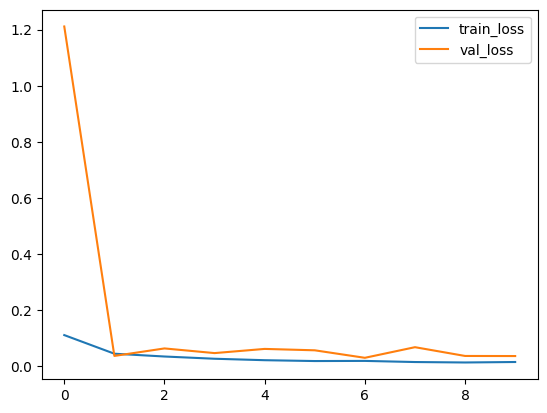

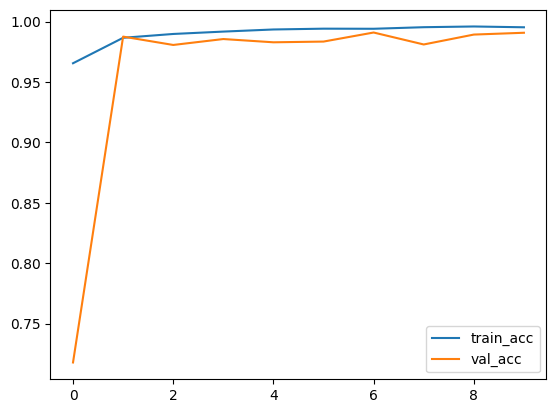

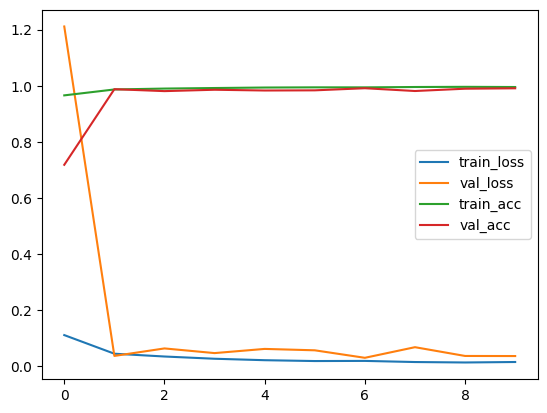

313/313 [==============================] - 1s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Confusion Matrix:
[[ 977    0    0    0    0    0    3    0    0    0]
 [   0 1133    1    1    0    0    0    0    0    0]
 [   1    1 1024    4    0    0    1   

In [10]:
# Gaussian Noise 10% + Epochs = 10


import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Activation, Add, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset and preprocess it
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Generate noisy images
x_train_noisy = x_train + 0.1 * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + 0.1 * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the noisy images to the [0, 1] range
x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

# Define the ResNet block
def res_block(x, filters, downsample=False):
    shortcut = x
    stride = 1
    if downsample:
        stride = 2
        shortcut = Conv2D(filters, 1, strides=stride)(shortcut)
        shortcut = BatchNormalization()(shortcut)
    x = Conv2D(filters, 3, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, 3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

# Define the ResNet model
inputs = Input(shape=(28,28,1))
x = Conv2D(64, 7, strides=2, padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(x)

x = res_block(x, 64)
x = res_block(x, 64)

x = res_block(x, 128, downsample=True)
x = res_block(x, 128)

x = res_block(x, 256, downsample=True)
x = res_block(x, 256)

x = GlobalAveragePooling2D()(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs, outputs)

# Compile the model
model.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train_noisy.reshape(-1,28,28,1), y_train,
                    validation_data=(x_test_noisy.reshape(-1,28,28,1), y_test),
                    batch_size=128,
                    epochs=10)

# Plot the loss curve
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()


# Plot the loss and accuracy curves
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

# Evaluate the model on the test set
y_pred = model.predict(x_test_noisy.reshape(-1,28,28,1))
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print the evaluation metrics
print('Classification Report:')
print(classification_report(y_true, y_pred_classes))

print('Confusion Matrix:')
print(confusion_matrix(y_true, y_pred_classes))



Epoch 1/20
469/469 [==============================] - 19s 18ms/step - loss: 0.1069 - accuracy: 0.9667 - val_loss: 0.1496 - val_accuracy: 0.9533
Epoch 2/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0442 - accuracy: 0.9861 - val_loss: 0.0445 - val_accuracy: 0.9850
Epoch 3/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0313 - accuracy: 0.9899 - val_loss: 0.0829 - val_accuracy: 0.9766
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0264 - accuracy: 0.9915 - val_loss: 0.0744 - val_accuracy: 0.9767
Epoch 5/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0222 - accuracy: 0.9928 - val_loss: 0.0438 - val_accuracy: 0.9870
Epoch 6/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0205 - accuracy: 0.9933 - val_loss: 0.0667 - val_accuracy: 0.9810
Epoch 7/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0164 - accuracy: 0.9946 - val_loss: 0.0599 - val_accuracy: 0.984

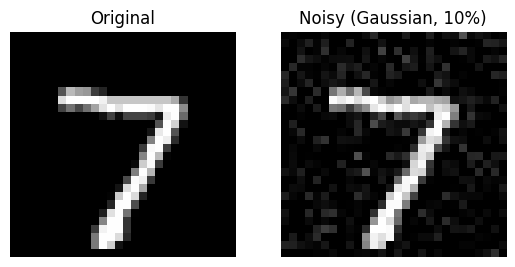

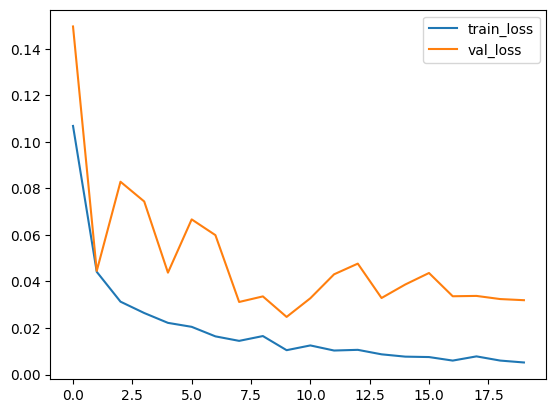

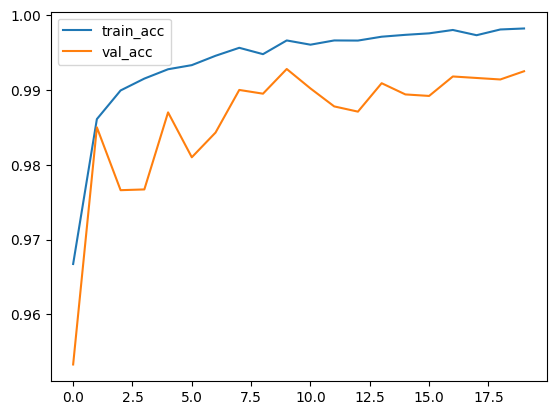

In [11]:
# Gaussian Noise = 10% with Epochs = 20

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Activation, Add, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset and preprocess it
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Generate noisy images
noise_scale = 0.1
x_train_noisy = x_train + noise_scale * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_scale * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the noisy images to the [0, 1] range
x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

# Define the ResNet block
def res_block(x, filters, downsample=False):
    shortcut = x
    stride = 1
    if downsample:
        stride = 2
        shortcut = Conv2D(filters, 1, strides=stride)(shortcut)
        shortcut = BatchNormalization()(shortcut)
    x = Conv2D(filters, 3, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, 3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

# Define the ResNet model
inputs = Input(shape=(28,28,1))
x = Conv2D(64, 7, strides=2, padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(x)

x = res_block(x, 64)
x = res_block(x, 64)

x = res_block(x, 128, downsample=True)
x = res_block(x, 128)

x = res_block(x, 256, downsample=True)
x = res_block(x, 256)

x = GlobalAveragePooling2D()(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs, outputs)

# Compile the model
model.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train_noisy.reshape(-1,28,28,1), y_train,
                    validation_data=(x_test_noisy.reshape(-1,28,28,1), y_test),
                    batch_size=128,
                    epochs=20)

# Evaluate the model on the test set
y_pred = model.predict(x_test.reshape(-1,28,28,1))
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print the evaluation metrics
print('Classification Report:')
print(classification_report(y_true, y_pred_classes))

print('Confusion Matrix:')
print(confusion_matrix(y_true, y_pred_classes))


# Plot a single image with and without noise
img_index = 0

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(x_test[img_index], cmap='gray')
plt.title('Original')
plt.axis('off')

# Plot the noisy image
noise_level = 0.10
plt.subplot(1, 2, 2)
plt.imshow(x_test_noisy[img_index], cmap='gray')
plt.title(f'Noisy (Gaussian, {noise_level*100:.0f}%)')
plt.axis('off')

plt.show()

# Plot the loss curve
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()




Epoch 1/10
375/375 [==============================] - 14s 32ms/step - loss: 0.1674 - accuracy: 0.9488 - val_loss: 0.0605 - val_accuracy: 0.9811
Epoch 2/10
375/375 [==============================] - 12s 31ms/step - loss: 0.0501 - accuracy: 0.9844 - val_loss: 0.0538 - val_accuracy: 0.9840
Epoch 3/10
375/375 [==============================] - 12s 32ms/step - loss: 0.0316 - accuracy: 0.9896 - val_loss: 0.0541 - val_accuracy: 0.9850
Epoch 4/10
375/375 [==============================] - 12s 31ms/step - loss: 0.0203 - accuracy: 0.9932 - val_loss: 0.0547 - val_accuracy: 0.9864
Epoch 5/10
375/375 [==============================] - 12s 31ms/step - loss: 0.0144 - accuracy: 0.9951 - val_loss: 0.0629 - val_accuracy: 0.9853
Epoch 6/10
375/375 [==============================] - 12s 32ms/step - loss: 0.0113 - accuracy: 0.9961 - val_loss: 0.0609 - val_accuracy: 0.9846
Epoch 7/10
313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0   

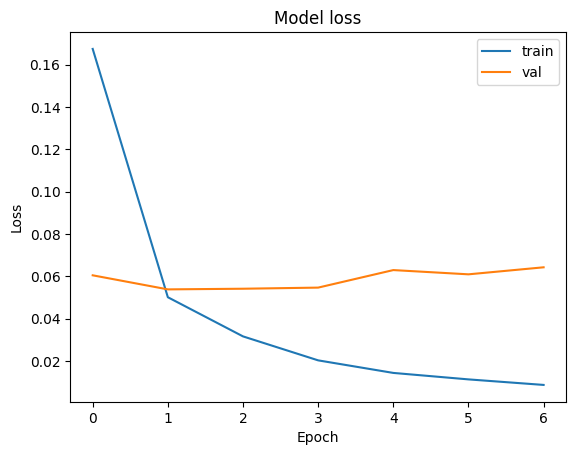

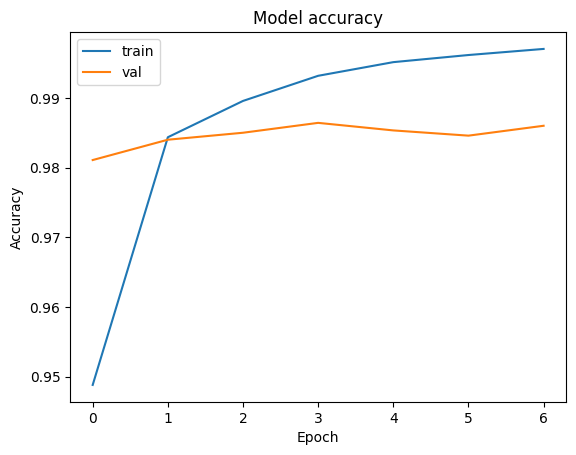

In [12]:
# Gaussian Noise -15% with Epochs = 10

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Add 15% Gaussian noise to the images
noise_factor = 0.15
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the ResNet model
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
tensorboard = TensorBoard(log_dir='./logs')

# Train the model
history = model.fit(X_train_noisy.reshape((-1, 28, 28, 1)), y_train, epochs=10, batch_size=128, validation_split=0.2, callbacks=[early_stopping, tensorboard])

# Evaluate the model on the test set
y_pred = model.predict(X_test_noisy.reshape((-1, 28, 28, 1)))
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print(classification_report(y_test_classes, y_pred_classes))
print(confusion_matrix(y_test_classes, y_pred_classes))

# Plot the loss and accuracy curves
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

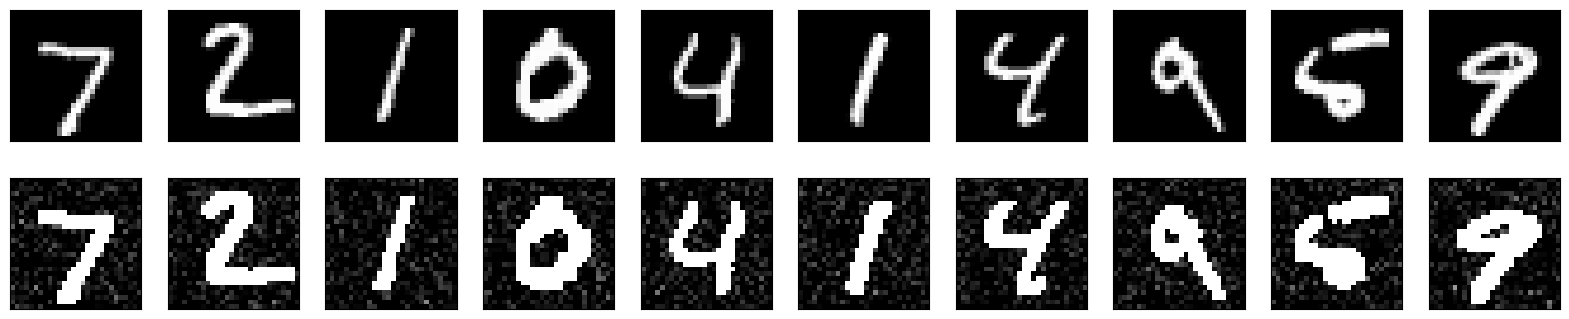

Epoch 1/20
375/375 [==============================] - 14s 32ms/step - loss: 0.1539 - accuracy: 0.9526 - val_loss: 0.0628 - val_accuracy: 0.9797
Epoch 2/20
375/375 [==============================] - 12s 32ms/step - loss: 0.0497 - accuracy: 0.9835 - val_loss: 0.0490 - val_accuracy: 0.9850
Epoch 3/20
375/375 [==============================] - 12s 31ms/step - loss: 0.0281 - accuracy: 0.9908 - val_loss: 0.0535 - val_accuracy: 0.9848
Epoch 4/20
375/375 [==============================] - 12s 32ms/step - loss: 0.0208 - accuracy: 0.9932 - val_loss: 0.0536 - val_accuracy: 0.9857
Epoch 5/20
375/375 [==============================] - 12s 31ms/step - loss: 0.0129 - accuracy: 0.9955 - val_loss: 0.0637 - val_accuracy: 0.9833
Epoch 6/20
375/375 [==============================] - 12s 31ms/step - loss: 0.0111 - accuracy: 0.9962 - val_loss: 0.0689 - val_accuracy: 0.9848
Epoch 7/20
313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0   

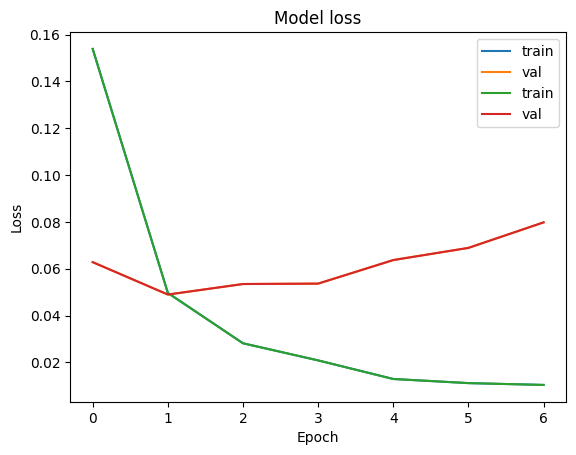

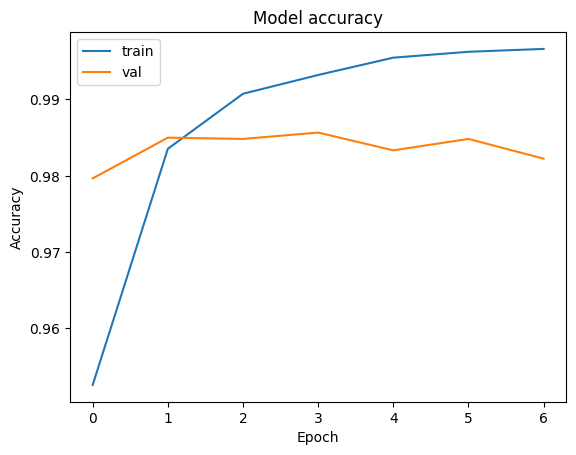

In [13]:
# Gaussian Noise -15% with Epochs = 20

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Add 15% Gaussian noise to the images
noise_factor = 0.15
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# Display original and noisy images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(X_test_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the ResNet model
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
tensorboard = TensorBoard(log_dir='./logs')

# Train the model
history = model.fit(X_train_noisy.reshape((-1, 28, 28, 1)), y_train, epochs=20, batch_size=128, validation_split=0.2, callbacks=[early_stopping, tensorboard])

# Evaluate the model on the test set
y_pred = model.predict(X_test_noisy.reshape((-1, 28, 28, 1)))
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print(classification_report(y_test_classes, y_pred_classes))
print(confusion_matrix(y_test_classes, y_pred_classes))

# Plot the loss and accuracy curves
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show

# Plot the loss curve
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

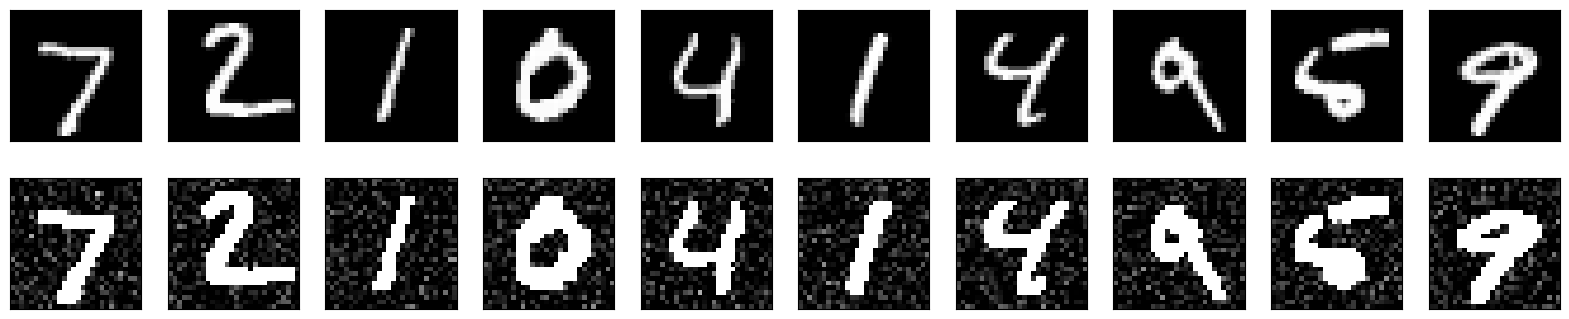

Epoch 1/20
375/375 [==============================] - 14s 31ms/step - loss: 0.1664 - accuracy: 0.9487 - val_loss: 0.0659 - val_accuracy: 0.9793
Epoch 2/20
375/375 [==============================] - 12s 32ms/step - loss: 0.0481 - accuracy: 0.9848 - val_loss: 0.0753 - val_accuracy: 0.9783
Epoch 3/20
375/375 [==============================] - 11s 30ms/step - loss: 0.0301 - accuracy: 0.9901 - val_loss: 0.0552 - val_accuracy: 0.9847
Epoch 4/20
375/375 [==============================] - 11s 31ms/step - loss: 0.0199 - accuracy: 0.9934 - val_loss: 0.0666 - val_accuracy: 0.9845
Epoch 5/20
375/375 [==============================] - 12s 32ms/step - loss: 0.0137 - accuracy: 0.9950 - val_loss: 0.0734 - val_accuracy: 0.9837
Epoch 6/20
375/375 [==============================] - 12s 32ms/step - loss: 0.0113 - accuracy: 0.9959 - val_loss: 0.0817 - val_accuracy: 0.9824
Epoch 7/20
375/375 [==============================] - 12s 32ms/step - loss: 0.0081 - accuracy: 0.9976 - val_loss: 0.0889 - val_accuracy:

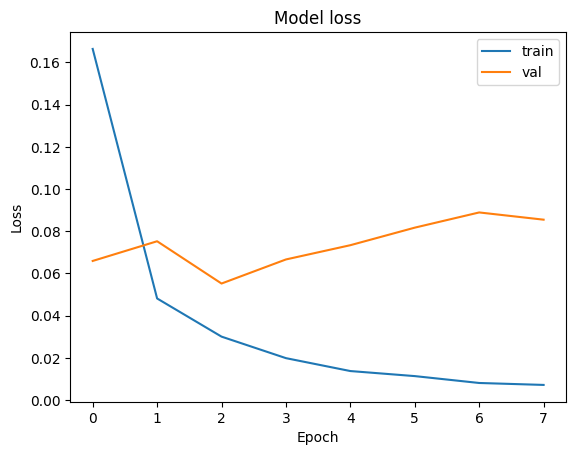

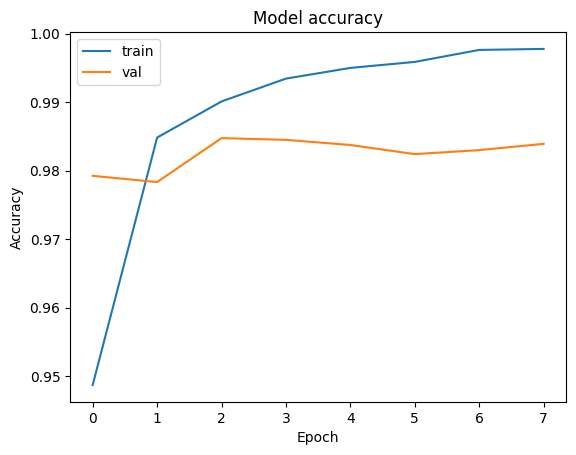

In [14]:
# Gaussian Noise -20% with Epochs =20


import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Add 20% Gaussian noise to the images
noise_factor = 0.2
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# Display original and noisy images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(X_test_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the ResNet model
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
tensorboard = TensorBoard(log_dir='./logs')

# Train the model
history = model.fit(X_train_noisy.reshape((-1, 28, 28, 1)), y_train, epochs=20, batch_size=128, validation_split=0.2, callbacks=[early_stopping, tensorboard])

# Evaluate the model on the test set
y_pred = model.predict(X_test_noisy.reshape((-1, 28, 28, 1)))
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print("Classification report:")
print(classification_report(y_test_classes, y_pred_classes))

print("Confusion matrix:")
print(confusion_matrix(y_test_classes, y_pred_classes))

# Plot the loss and accuracy curves

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

     


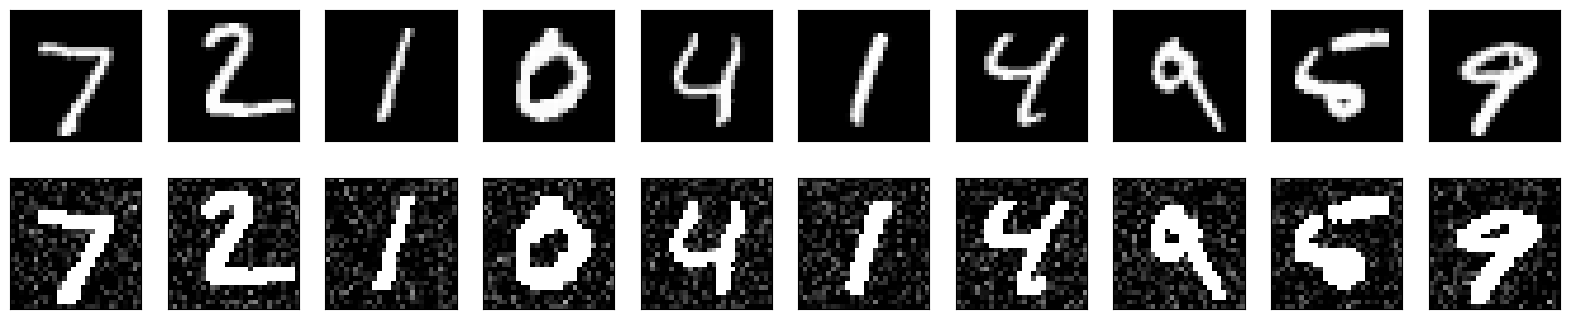

Epoch 1/10
375/375 [==============================] - 13s 31ms/step - loss: 0.1740 - accuracy: 0.9476 - val_loss: 0.0681 - val_accuracy: 0.9779
Epoch 2/10
375/375 [==============================] - 11s 30ms/step - loss: 0.0488 - accuracy: 0.9847 - val_loss: 0.0585 - val_accuracy: 0.9826
Epoch 3/10
375/375 [==============================] - 12s 32ms/step - loss: 0.0289 - accuracy: 0.9908 - val_loss: 0.0646 - val_accuracy: 0.9798
Epoch 4/10
375/375 [==============================] - 11s 31ms/step - loss: 0.0189 - accuracy: 0.9937 - val_loss: 0.0509 - val_accuracy: 0.9852
Epoch 5/10
375/375 [==============================] - 12s 31ms/step - loss: 0.0137 - accuracy: 0.9953 - val_loss: 0.0664 - val_accuracy: 0.9847
Epoch 6/10
375/375 [==============================] - 11s 31ms/step - loss: 0.0113 - accuracy: 0.9962 - val_loss: 0.0655 - val_accuracy: 0.9839
Epoch 7/10
375/375 [==============================] - 12s 32ms/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.0649 - val_accuracy:

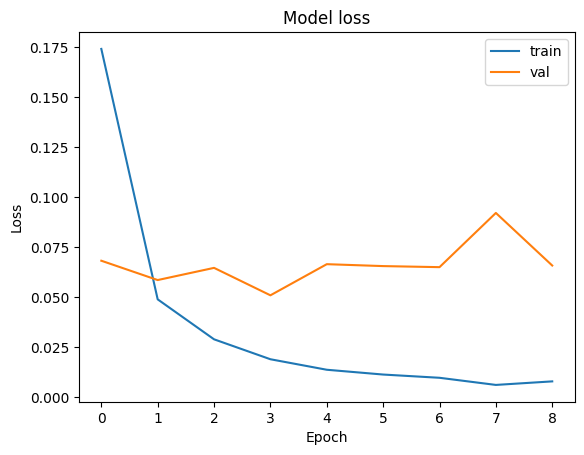

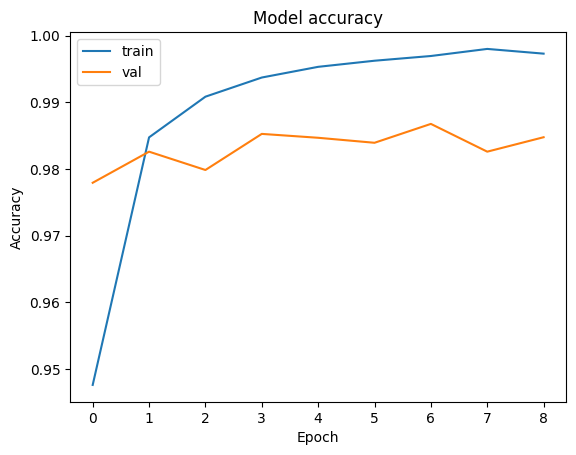

In [15]:
# Gaussian Noise -20% with Epochs=10


import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Add 20% Gaussian noise to the images
noise_factor = 0.2
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# Display original and noisy images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(X_test_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the ResNet model
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
tensorboard = TensorBoard(log_dir='./logs')

# Train the model
history = model.fit(X_train_noisy.reshape((-1, 28, 28, 1)), y_train, epochs=10, batch_size=128, validation_split=0.2, callbacks=[early_stopping, tensorboard])

# Evaluate the model on the test set
y_pred = model.predict(X_test_noisy.reshape((-1, 28, 28, 1)))
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print("Classification report:")
print(classification_report(y_test_classes, y_pred_classes))

print("Confusion matrix:")
print(confusion_matrix(y_test_classes, y_pred_classes))

# Plot the loss and accuracy curves

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
     

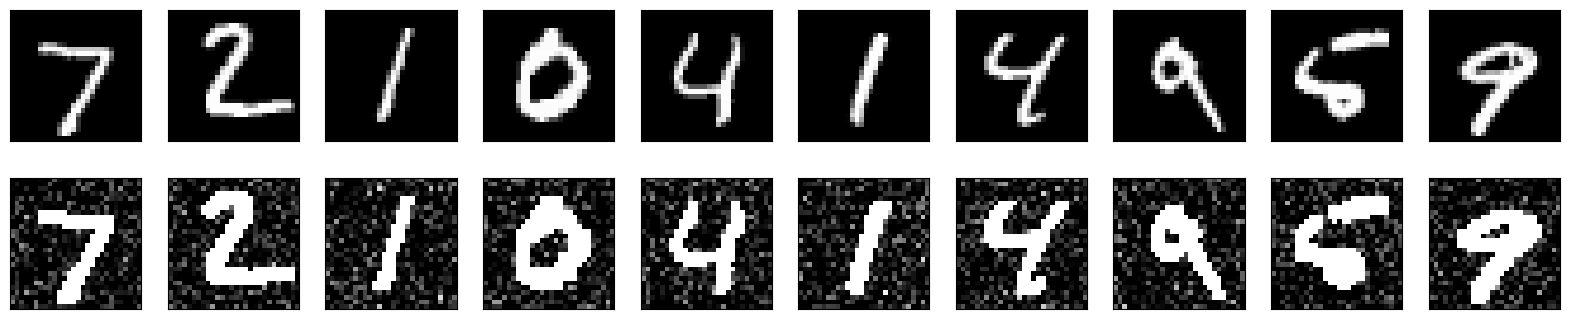

Epoch 1/20
375/375 [==============================] - 14s 33ms/step - loss: 0.1604 - accuracy: 0.9507 - val_loss: 0.0783 - val_accuracy: 0.9756
Epoch 2/20
375/375 [==============================] - 12s 32ms/step - loss: 0.0489 - accuracy: 0.9846 - val_loss: 0.0542 - val_accuracy: 0.9839
Epoch 3/20
375/375 [==============================] - 12s 32ms/step - loss: 0.0307 - accuracy: 0.9905 - val_loss: 0.0546 - val_accuracy: 0.9847
Epoch 4/20
375/375 [==============================] - 12s 31ms/step - loss: 0.0198 - accuracy: 0.9932 - val_loss: 0.0594 - val_accuracy: 0.9822
Epoch 5/20
375/375 [==============================] - 12s 32ms/step - loss: 0.0145 - accuracy: 0.9951 - val_loss: 0.0759 - val_accuracy: 0.9839
Epoch 6/20
375/375 [==============================] - 12s 32ms/step - loss: 0.0109 - accuracy: 0.9966 - val_loss: 0.0654 - val_accuracy: 0.9850
Epoch 7/20
313/313 [==============================] - 1s 3ms/step
Classification Report:
               precision    recall  f1-score   

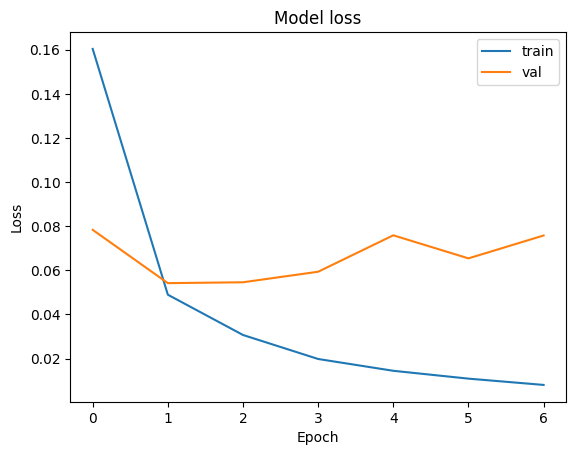

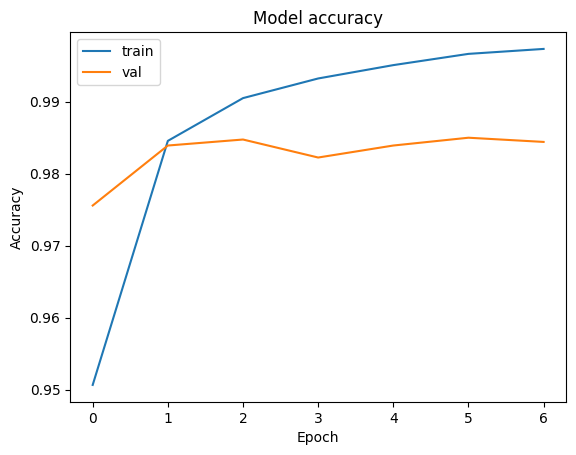

In [16]:
# Gaussian Noise -25% with Epochs=20


import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Add 25% Gaussian noise to the images
noise_factor = 0.25
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# Display original and noisy images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(X_test_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the ResNet model
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
tensorboard = TensorBoard(log_dir='./logs')

# Train the model
history = model.fit(X_train_noisy.reshape((-1, 28, 28, 1)), y_train, epochs=20, batch_size=128, validation_split=0.2, callbacks=[early_stopping, tensorboard])

# Evaluate the model on the test set
y_pred = model.predict(X_test_noisy.reshape((-1, 28, 28, 1)))
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Print classification report, precision, recall and confusion matrix
print('Classification Report:\n', classification_report(y_test_classes, y_pred_classes))
print('Confusion Matrix:\n', confusion_matrix(y_test_classes, y_pred_classes))

# Plot the loss and accuracy curves


plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

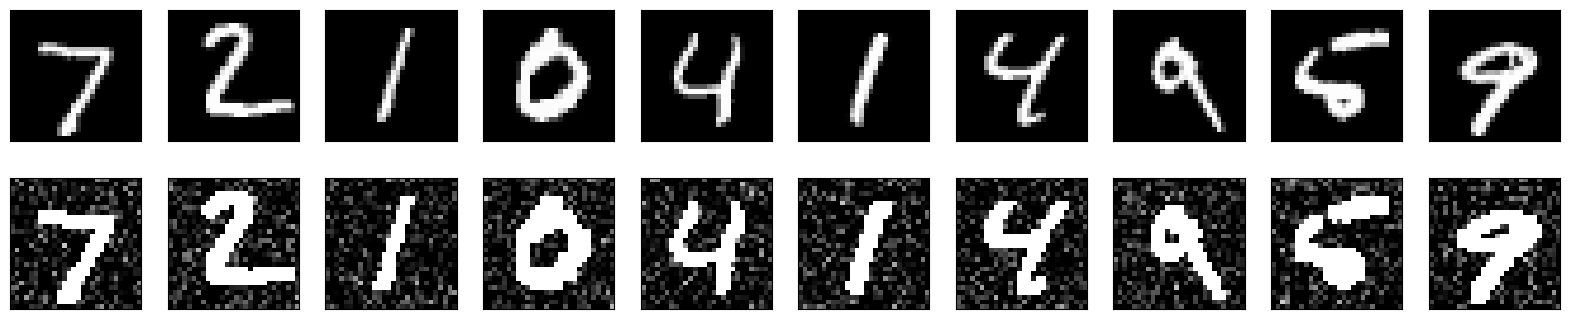

Epoch 1/10
375/375 [==============================] - 14s 32ms/step - loss: 0.1912 - accuracy: 0.9401 - val_loss: 0.0746 - val_accuracy: 0.9783
Epoch 2/10
375/375 [==============================] - 12s 31ms/step - loss: 0.0531 - accuracy: 0.9835 - val_loss: 0.0541 - val_accuracy: 0.9834
Epoch 3/10
375/375 [==============================] - 11s 31ms/step - loss: 0.0323 - accuracy: 0.9891 - val_loss: 0.0582 - val_accuracy: 0.9825
Epoch 4/10
375/375 [==============================] - 12s 32ms/step - loss: 0.0209 - accuracy: 0.9933 - val_loss: 0.0557 - val_accuracy: 0.9854
Epoch 5/10
375/375 [==============================] - 12s 32ms/step - loss: 0.0137 - accuracy: 0.9954 - val_loss: 0.0644 - val_accuracy: 0.9846
Epoch 6/10
375/375 [==============================] - 12s 31ms/step - loss: 0.0113 - accuracy: 0.9960 - val_loss: 0.0749 - val_accuracy: 0.9839
Epoch 7/10
313/313 [==============================] - 1s 3ms/step
Classification Report:
               precision    recall  f1-score   

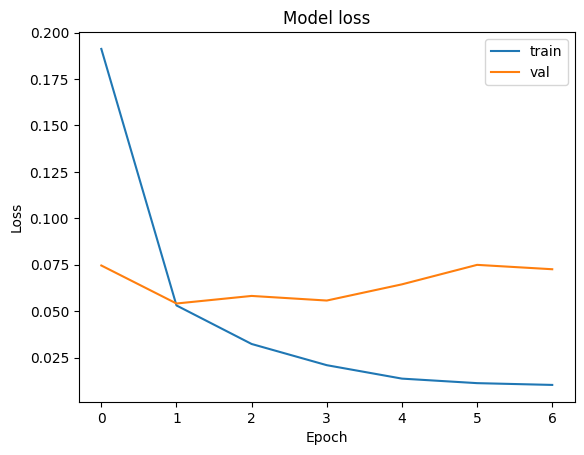

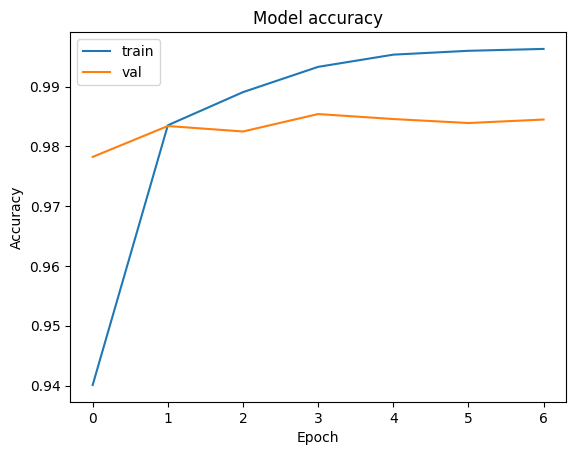

In [17]:
# Gaussian Noise -25% with epochs =10


import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Add 25% Gaussian noise to the images
noise_factor = 0.25
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# Display original and noisy images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(X_test_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the ResNet model
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
tensorboard = TensorBoard(log_dir='./logs')

# Train the model
history = model.fit(X_train_noisy.reshape((-1, 28, 28, 1)), y_train, epochs=10, batch_size=128, validation_split=0.2, callbacks=[early_stopping, tensorboard])

# Evaluate the model on the test set
y_pred = model.predict(X_test_noisy.reshape((-1, 28, 28, 1)))
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Print classification report, precision, recall and confusion matrix
print('Classification Report:\n', classification_report(y_test_classes, y_pred_classes))
print('Confusion Matrix:\n', confusion_matrix(y_test_classes, y_pred_classes))

# Plot the loss and accuracy curves


plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

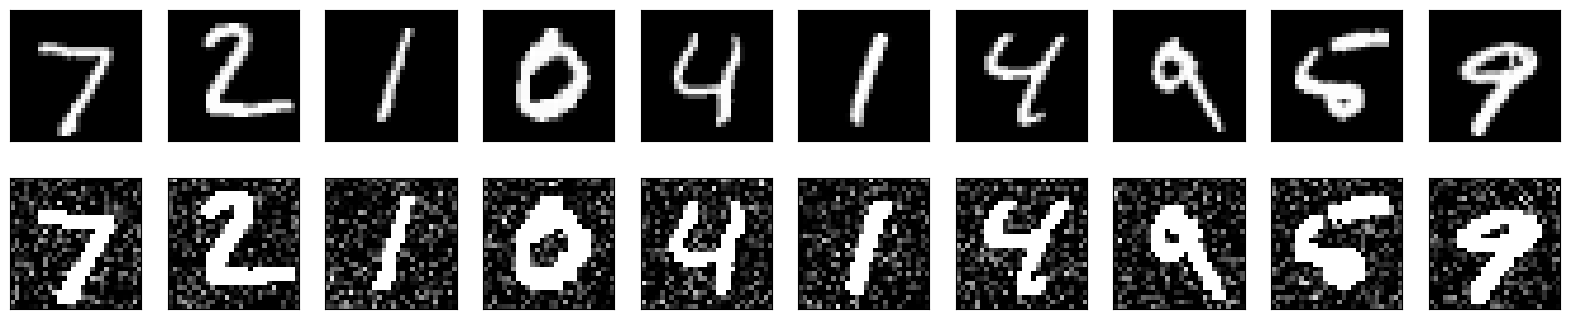

Epoch 1/10
375/375 [==============================] - 14s 32ms/step - loss: 0.1783 - accuracy: 0.9440 - val_loss: 0.0753 - val_accuracy: 0.9764
Epoch 2/10
375/375 [==============================] - 12s 32ms/step - loss: 0.0510 - accuracy: 0.9843 - val_loss: 0.0640 - val_accuracy: 0.9809
Epoch 3/10
375/375 [==============================] - 12s 32ms/step - loss: 0.0336 - accuracy: 0.9888 - val_loss: 0.0829 - val_accuracy: 0.9759
Epoch 4/10
375/375 [==============================] - 12s 32ms/step - loss: 0.0206 - accuracy: 0.9931 - val_loss: 0.0574 - val_accuracy: 0.9853
Epoch 5/10
375/375 [==============================] - 12s 31ms/step - loss: 0.0139 - accuracy: 0.9951 - val_loss: 0.0768 - val_accuracy: 0.9833
Epoch 6/10
375/375 [==============================] - 12s 32ms/step - loss: 0.0111 - accuracy: 0.9961 - val_loss: 0.0664 - val_accuracy: 0.9841
Epoch 7/10
375/375 [==============================] - 12s 31ms/step - loss: 0.0095 - accuracy: 0.9968 - val_loss: 0.0727 - val_accuracy:

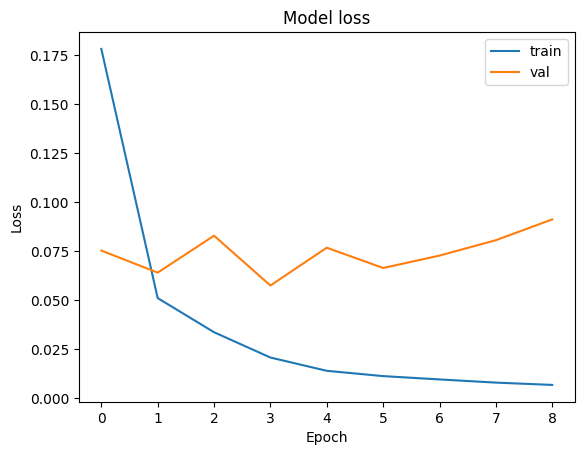

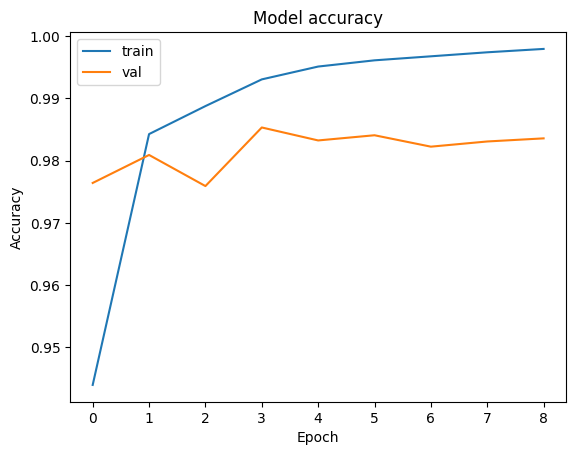

In [18]:
# Gaussian Noise 30% with Epochs = 10


import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Add 30% Gaussian noise to the images
noise_factor = 0.3
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# Display original and noisy images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(X_test_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the ResNet model
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
tensorboard = TensorBoard(log_dir='./logs')

# Train the model
history = model.fit(X_train_noisy.reshape((-1, 28, 28, 1)), y_train, epochs=10, batch_size=128, validation_split=0.2, callbacks=[early_stopping, tensorboard])

# Evaluate the model on the test set
y_pred = model.predict(X_test_noisy.reshape((-1, 28, 28, 1)))
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Print classification report, precision, recall and confusion matrix
print('Classification Report:\n', classification_report(y_test_classes, y_pred_classes))
print('Confusion Matrix:\n', confusion_matrix(y_test_classes, y_pred_classes))

# Plot the loss and accuracy curves


plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


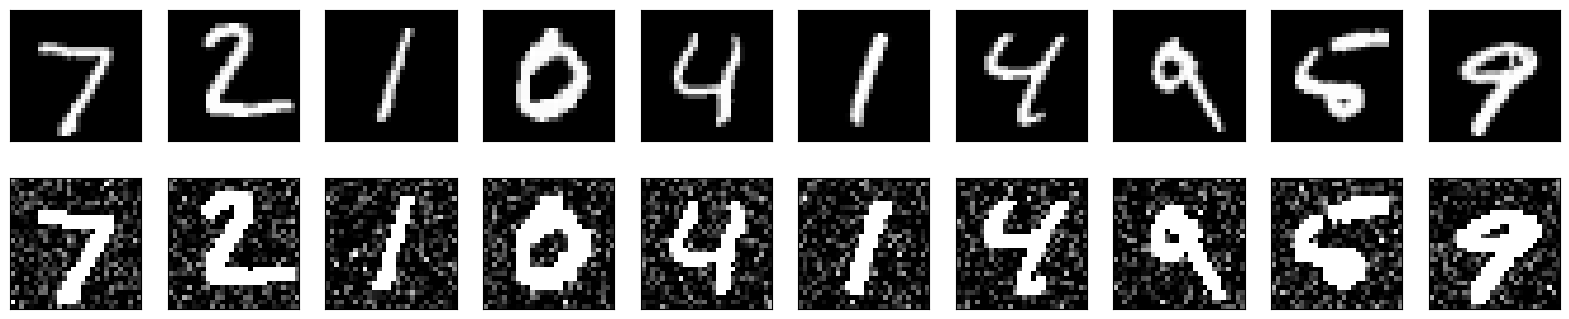

Epoch 1/20
375/375 [==============================] - 14s 31ms/step - loss: 0.1886 - accuracy: 0.9428 - val_loss: 0.0799 - val_accuracy: 0.9764
Epoch 2/20
375/375 [==============================] - 12s 32ms/step - loss: 0.0547 - accuracy: 0.9826 - val_loss: 0.0609 - val_accuracy: 0.9822
Epoch 3/20
375/375 [==============================] - 12s 32ms/step - loss: 0.0338 - accuracy: 0.9896 - val_loss: 0.0569 - val_accuracy: 0.9835
Epoch 4/20
375/375 [==============================] - 12s 32ms/step - loss: 0.0211 - accuracy: 0.9927 - val_loss: 0.0603 - val_accuracy: 0.9836
Epoch 5/20
375/375 [==============================] - 12s 32ms/step - loss: 0.0140 - accuracy: 0.9952 - val_loss: 0.0574 - val_accuracy: 0.9844
Epoch 6/20
375/375 [==============================] - 12s 31ms/step - loss: 0.0111 - accuracy: 0.9964 - val_loss: 0.0740 - val_accuracy: 0.9831
Epoch 7/20
375/375 [==============================] - 12s 31ms/step - loss: 0.0097 - accuracy: 0.9964 - val_loss: 0.0722 - val_accuracy:

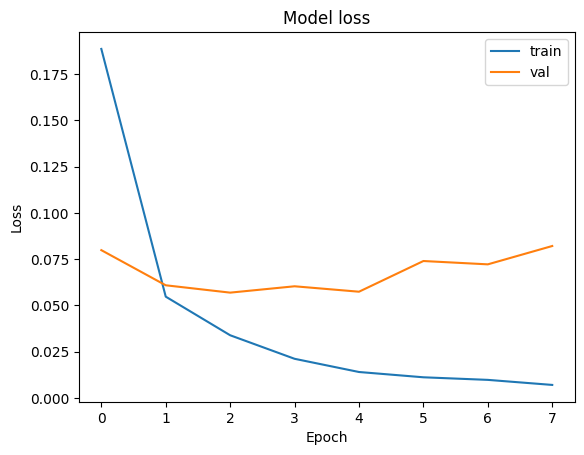

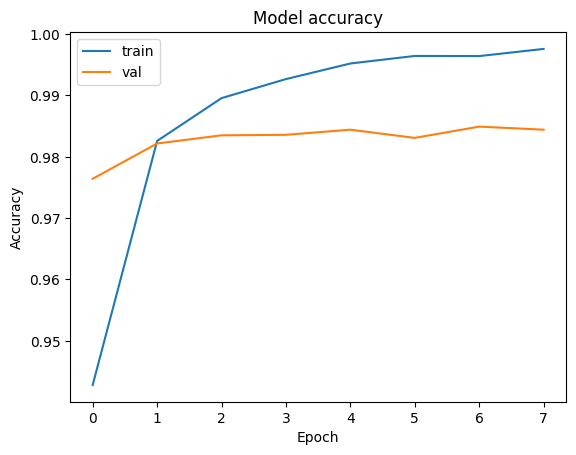

In [19]:
# Gaussian Noise -30% with Epochs = 20


import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Add 30% Gaussian noise to the images
noise_factor = 0.3
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# Display original and noisy images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(X_test_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the ResNet model
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
tensorboard = TensorBoard(log_dir='./logs')

# Train the model
history = model.fit(X_train_noisy.reshape((-1, 28, 28, 1)), y_train, epochs=20, batch_size=128, validation_split=0.2, callbacks=[early_stopping, tensorboard])

# Evaluate the model on the test set
y_pred = model.predict(X_test_noisy.reshape((-1, 28, 28, 1)))
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Print classification report, precision, recall and confusion matrix
print('Classification Report:\n', classification_report(y_test_classes, y_pred_classes))
print('Confusion Matrix:\n', confusion_matrix(y_test_classes, y_pred_classes))

# Plot the loss and accuracy curves


plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

     

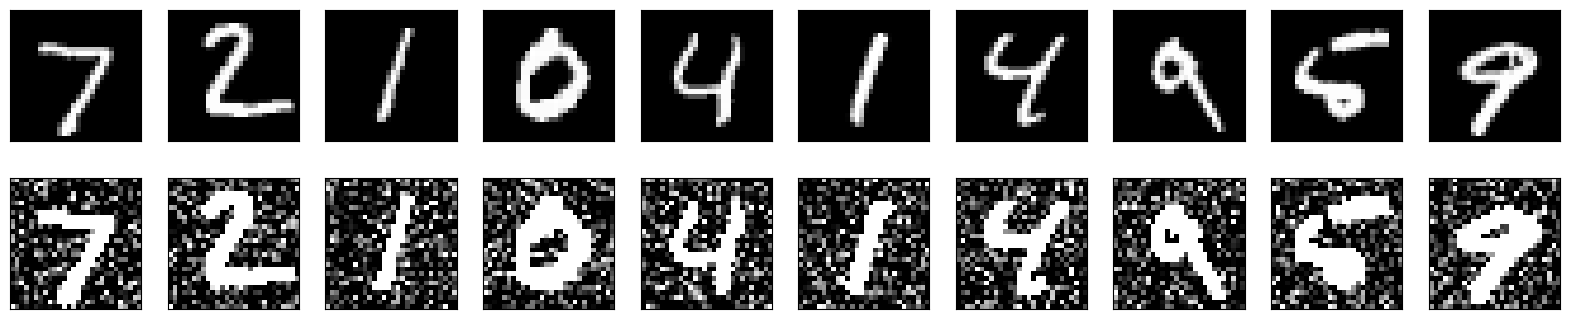

Epoch 1/10
375/375 [==============================] - 14s 32ms/step - loss: 0.2106 - accuracy: 0.9345 - val_loss: 0.0761 - val_accuracy: 0.9772
Epoch 2/10
375/375 [==============================] - 12s 31ms/step - loss: 0.0588 - accuracy: 0.9813 - val_loss: 0.0565 - val_accuracy: 0.9829
Epoch 3/10
375/375 [==============================] - 12s 32ms/step - loss: 0.0357 - accuracy: 0.9884 - val_loss: 0.0626 - val_accuracy: 0.9817
Epoch 4/10
375/375 [==============================] - 11s 31ms/step - loss: 0.0219 - accuracy: 0.9926 - val_loss: 0.0531 - val_accuracy: 0.9854
Epoch 5/10
375/375 [==============================] - 11s 31ms/step - loss: 0.0157 - accuracy: 0.9948 - val_loss: 0.0593 - val_accuracy: 0.9839
Epoch 6/10
375/375 [==============================] - 11s 31ms/step - loss: 0.0103 - accuracy: 0.9964 - val_loss: 0.0799 - val_accuracy: 0.9833
Epoch 7/10
375/375 [==============================] - 12s 31ms/step - loss: 0.0096 - accuracy: 0.9968 - val_loss: 0.0894 - val_accuracy:

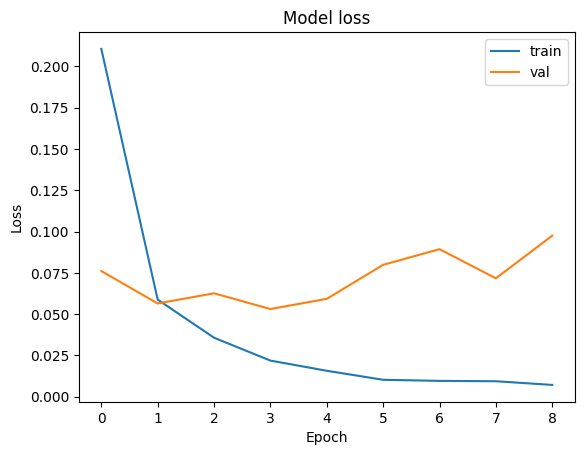

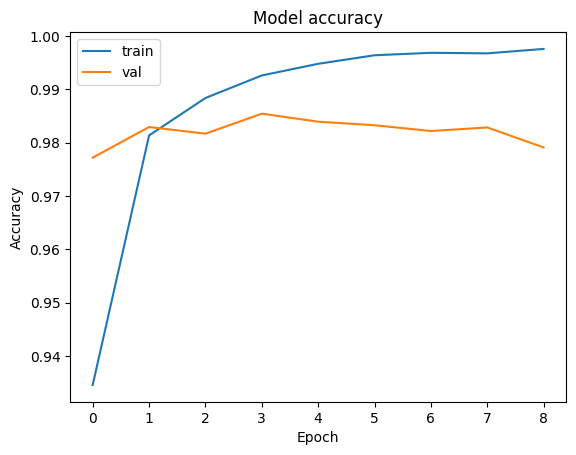

In [20]:
# Gaussian Noise -50% with Epochs = 10


import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Add 50% Gaussian noise to the images
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# Display original and noisy images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(X_test_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the ResNet model
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
tensorboard = TensorBoard(log_dir='./logs')

# Train the model
history = model.fit(X_train_noisy.reshape((-1, 28, 28, 1)), y_train, epochs=10, batch_size=128, validation_split=0.2, callbacks=[early_stopping, tensorboard])

# Evaluate the model on the test set
y_pred = model.predict(X_test_noisy.reshape((-1, 28, 28, 1)))
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Print classification report, precision, recall and confusion matrix
print('Classification Report:\n', classification_report(y_test_classes, y_pred_classes))
print('Confusion Matrix:\n', confusion_matrix(y_test_classes, y_pred_classes))


# Plot the loss and accuracy curves


plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


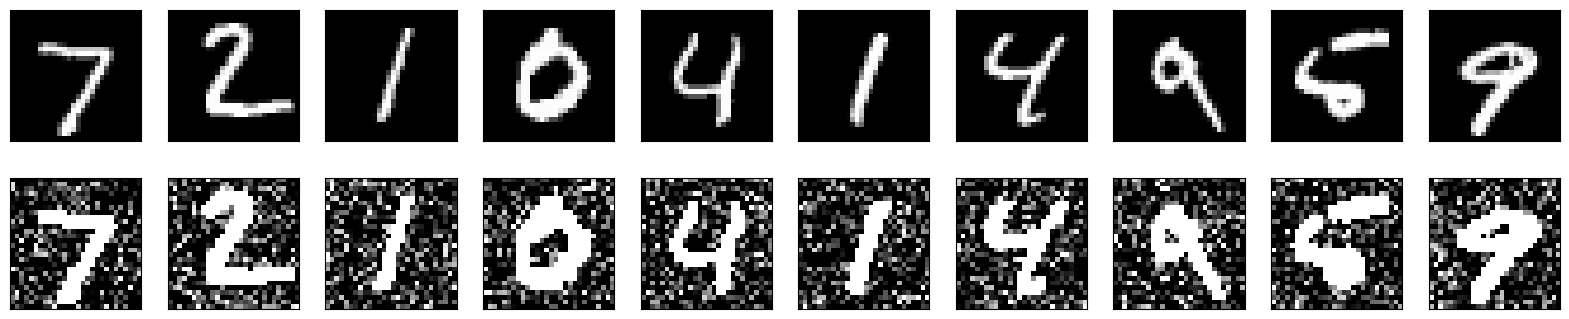

Epoch 1/20
375/375 [==============================] - 15s 33ms/step - loss: 0.1905 - accuracy: 0.9410 - val_loss: 0.0817 - val_accuracy: 0.9753
Epoch 2/20
375/375 [==============================] - 12s 32ms/step - loss: 0.0569 - accuracy: 0.9821 - val_loss: 0.0791 - val_accuracy: 0.9758
Epoch 3/20
375/375 [==============================] - 12s 31ms/step - loss: 0.0330 - accuracy: 0.9894 - val_loss: 0.0684 - val_accuracy: 0.9818
Epoch 4/20
375/375 [==============================] - 12s 32ms/step - loss: 0.0194 - accuracy: 0.9935 - val_loss: 0.0751 - val_accuracy: 0.9821
Epoch 5/20
375/375 [==============================] - 12s 32ms/step - loss: 0.0153 - accuracy: 0.9946 - val_loss: 0.0666 - val_accuracy: 0.9843
Epoch 6/20
375/375 [==============================] - 12s 32ms/step - loss: 0.0113 - accuracy: 0.9963 - val_loss: 0.0681 - val_accuracy: 0.9848
Epoch 7/20
375/375 [==============================] - 12s 32ms/step - loss: 0.0082 - accuracy: 0.9974 - val_loss: 0.0757 - val_accuracy:

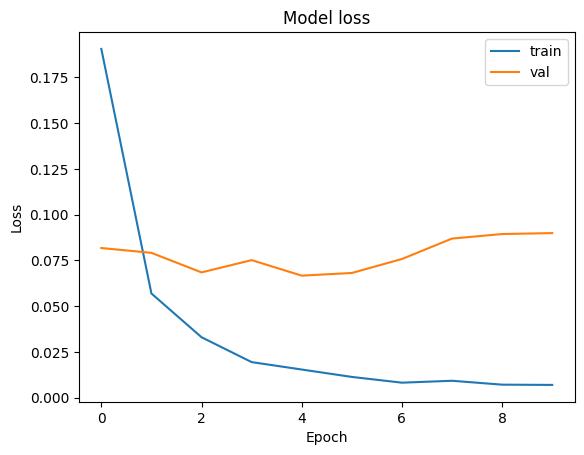

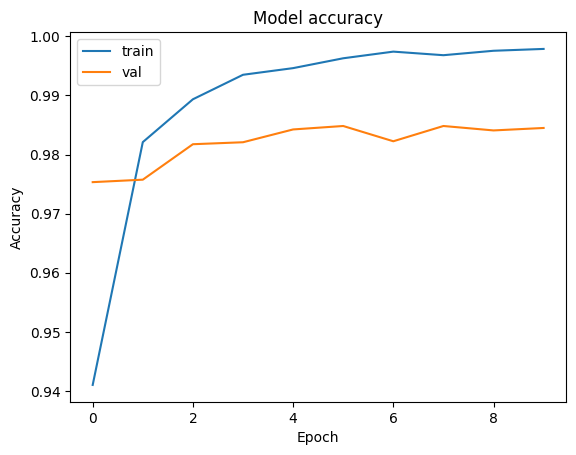

In [21]:
# Gaussian Noise - 50% with Epochs = 20


import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Add 50% Gaussian noise to the images
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# Display original and noisy images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(X_test_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the ResNet model
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
tensorboard = TensorBoard(log_dir='./logs')

# Train the model
history = model.fit(X_train_noisy.reshape((-1, 28, 28, 1)), y_train, epochs=20, batch_size=128, validation_split=0.2, callbacks=[early_stopping, tensorboard])

# Evaluate the model on the test set
y_pred = model.predict(X_test_noisy.reshape((-1, 28, 28, 1)))
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Print classification report, precision, recall and confusion matrix
print('Classification Report:\n', classification_report(y_test_classes, y_pred_classes))
print('Confusion Matrix:\n', confusion_matrix(y_test_classes, y_pred_classes))


# Plot the loss and accuracy curves


plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

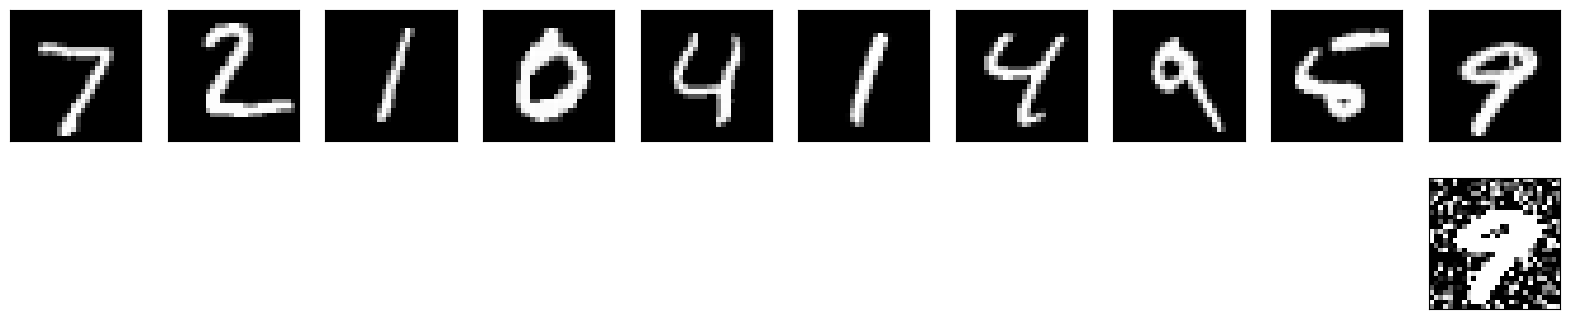

Epoch 1/20
375/375 [==============================] - 16s 31ms/step - loss: 0.3078 - accuracy: 0.9063 - val_loss: 0.0983 - val_accuracy: 0.9697
Epoch 2/20
375/375 [==============================] - 11s 30ms/step - loss: 0.0774 - accuracy: 0.9764 - val_loss: 0.0702 - val_accuracy: 0.9784
Epoch 3/20
375/375 [==============================] - 11s 30ms/step - loss: 0.0514 - accuracy: 0.9835 - val_loss: 0.0661 - val_accuracy: 0.9805
Epoch 4/20
375/375 [==============================] - 12s 31ms/step - loss: 0.0337 - accuracy: 0.9888 - val_loss: 0.0621 - val_accuracy: 0.9807
Epoch 5/20
375/375 [==============================] - 11s 30ms/step - loss: 0.0208 - accuracy: 0.9926 - val_loss: 0.0733 - val_accuracy: 0.9802
Epoch 6/20
375/375 [==============================] - 12s 32ms/step - loss: 0.0137 - accuracy: 0.9954 - val_loss: 0.0768 - val_accuracy: 0.9811
Epoch 7/20
375/375 [==============================] - 12s 32ms/step - loss: 0.0112 - accuracy: 0.9960 - val_loss: 0.0924 - val_accuracy:

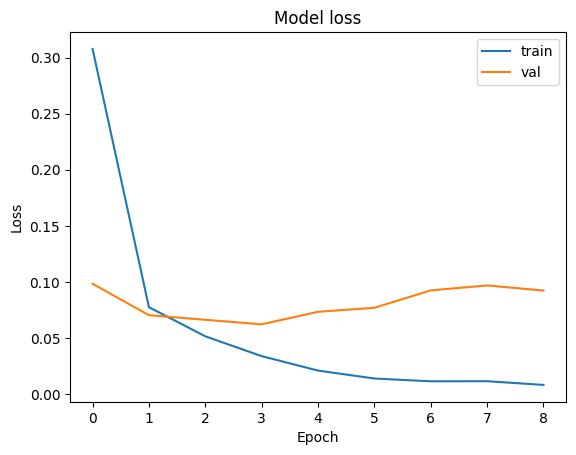

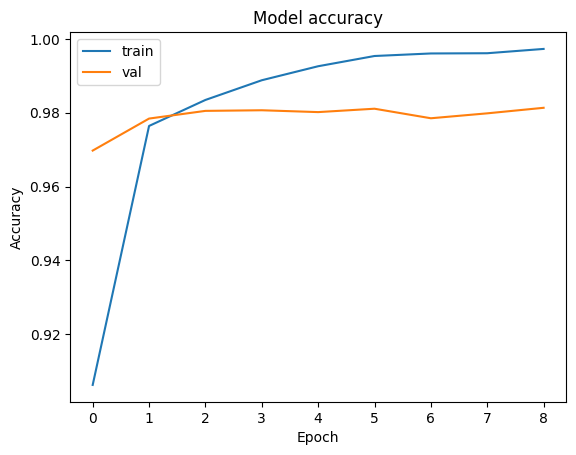

In [23]:
# Gaussian Noise -75% with Epochs = 20


import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

#Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#Add 75% Gaussian noise to the images
noise_factor = 0.75
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

#Display original and noisy images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # Original image
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(X_test[i])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

# Noisy image
ax = plt.subplot(2, n, i + 1 + n)
plt.imshow(X_test_noisy[i])
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

#Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#Define the ResNet model
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

#Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

#Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
tensorboard = TensorBoard(log_dir='./logs')

#Train the model
history = model.fit(X_train_noisy.reshape((-1, 28, 28, 1)), y_train, epochs=20, batch_size=128, validation_split=0.2, callbacks=[early_stopping, tensorboard])

#Evaluate the model on the test set

y_pred = model.predict(X_test_noisy.reshape((-1, 28, 28, 1)))
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

#Print classification report, precision, recall and confusion matrix

print('Classification Report:\n', classification_report(y_test_classes, y_pred_classes))
print('Confusion Matrix:\n', confusion_matrix(y_test_classes, y_pred_classes))

#Plot the loss and accuracy curves

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
     

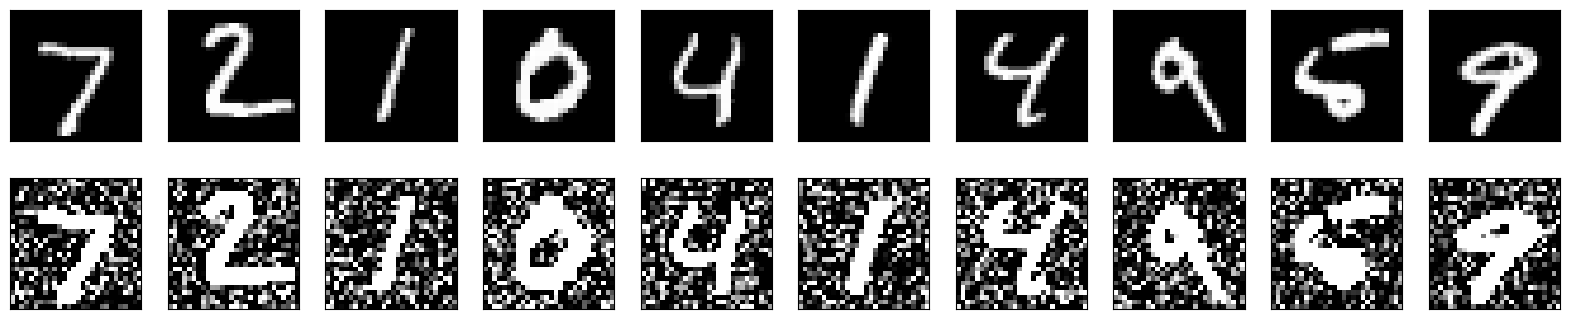

Epoch 1/10
375/375 [==============================] - 13s 31ms/step - loss: 0.3200 - accuracy: 0.9012 - val_loss: 0.0983 - val_accuracy: 0.9708
Epoch 2/10
375/375 [==============================] - 12s 31ms/step - loss: 0.0822 - accuracy: 0.9741 - val_loss: 0.0735 - val_accuracy: 0.9762
Epoch 3/10
375/375 [==============================] - 12s 31ms/step - loss: 0.0539 - accuracy: 0.9830 - val_loss: 0.0772 - val_accuracy: 0.9753
Epoch 4/10
375/375 [==============================] - 12s 31ms/step - loss: 0.0350 - accuracy: 0.9880 - val_loss: 0.0678 - val_accuracy: 0.9816
Epoch 5/10
375/375 [==============================] - 12s 32ms/step - loss: 0.0232 - accuracy: 0.9924 - val_loss: 0.0782 - val_accuracy: 0.9809
Epoch 6/10
375/375 [==============================] - 11s 30ms/step - loss: 0.0149 - accuracy: 0.9952 - val_loss: 0.0848 - val_accuracy: 0.9786
Epoch 7/10
375/375 [==============================] - 11s 31ms/step - loss: 0.0127 - accuracy: 0.9954 - val_loss: 0.0926 - val_accuracy:

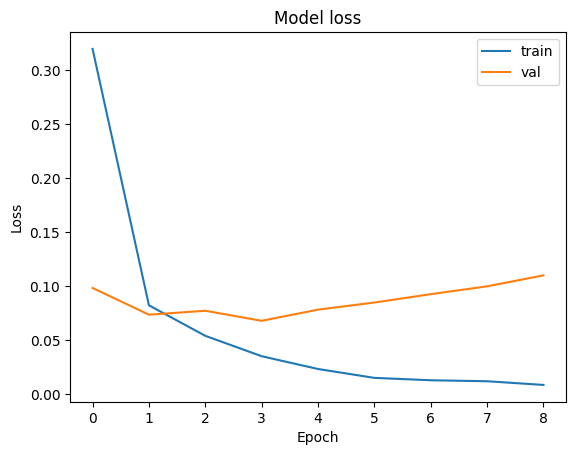

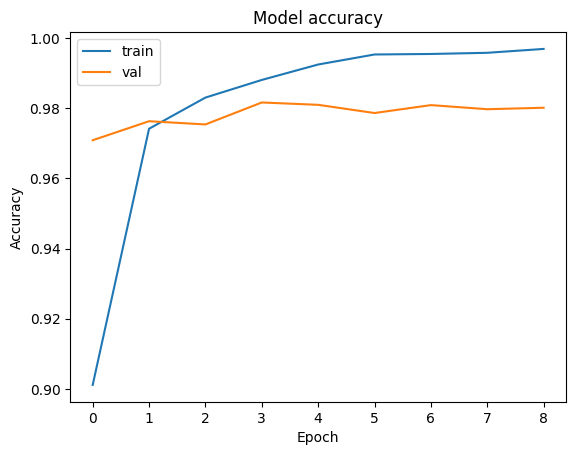

In [24]:
# Gaussian Noise -75% with Epochs = 10


import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Add 75% Gaussian noise to the images
noise_factor = 0.75
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# Display original and noisy images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(X_test_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the ResNet model
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
tensorboard = TensorBoard(log_dir='./logs')

# Train the model
history = model.fit(X_train_noisy.reshape((-1, 28, 28, 1)), y_train, epochs=10, batch_size=128, validation_split=0.2, callbacks=[early_stopping, tensorboard])

# Evaluate the model on the test set
y_pred = model.predict(X_test_noisy.reshape((-1, 28, 28, 1)))
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Print classification report, precision, recall and confusion matrix
print('Classification Report:\n', classification_report(y_test_classes, y_pred_classes))
print('Confusion Matrix:\n', confusion_matrix(y_test_classes, y_pred_classes))

# Plot the loss and accuracy curves

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()




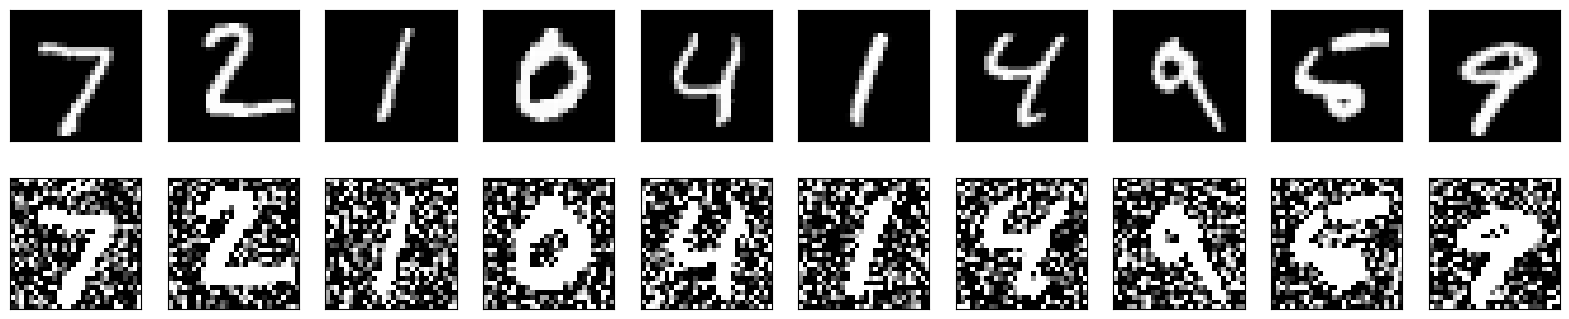

Epoch 1/20
375/375 [==============================] - 15s 34ms/step - loss: 0.3585 - accuracy: 0.8885 - val_loss: 0.1131 - val_accuracy: 0.9653
Epoch 2/20
375/375 [==============================] - 11s 30ms/step - loss: 0.0877 - accuracy: 0.9726 - val_loss: 0.0801 - val_accuracy: 0.9761
Epoch 3/20
375/375 [==============================] - 11s 30ms/step - loss: 0.0556 - accuracy: 0.9829 - val_loss: 0.0703 - val_accuracy: 0.9783
Epoch 4/20
375/375 [==============================] - 11s 30ms/step - loss: 0.0365 - accuracy: 0.9881 - val_loss: 0.0858 - val_accuracy: 0.9758
Epoch 5/20
375/375 [==============================] - 11s 30ms/step - loss: 0.0252 - accuracy: 0.9913 - val_loss: 0.0915 - val_accuracy: 0.9766
Epoch 6/20
375/375 [==============================] - 11s 30ms/step - loss: 0.0161 - accuracy: 0.9943 - val_loss: 0.0823 - val_accuracy: 0.9790
Epoch 7/20
375/375 [==============================] - 12s 32ms/step - loss: 0.0123 - accuracy: 0.9962 - val_loss: 0.1042 - val_accuracy:

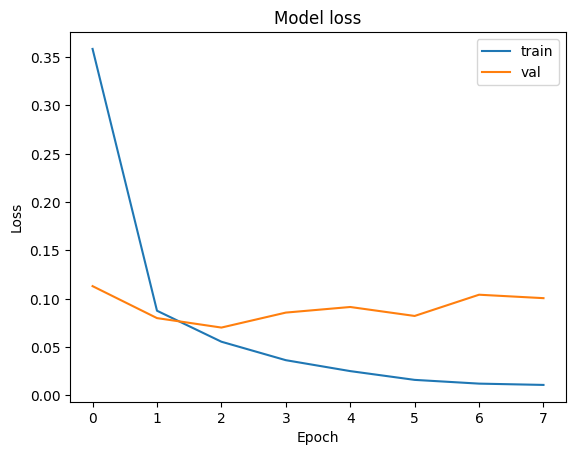

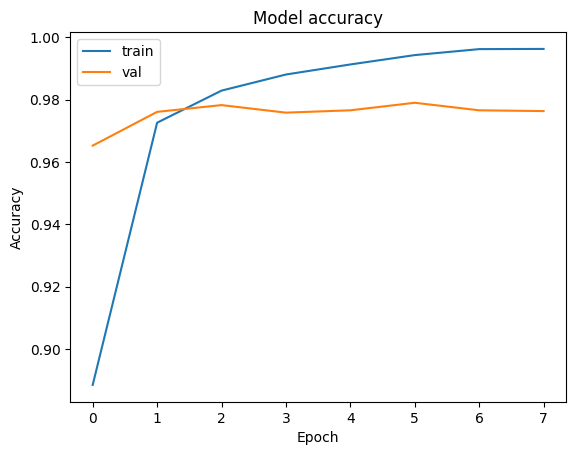

In [25]:
# Gaussian Noise -100% with Epochs = 20


import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Add 100% Gaussian noise to the images
noise_factor = 1.0
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# Display original and noisy images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(X_test_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the ResNet model
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
tensorboard = TensorBoard(log_dir='./logs')

# Train the model
history = model.fit(X_train_noisy.reshape((-1, 28, 28, 1)), y_train, epochs=20, batch_size=128, validation_split=0.2, callbacks=[early_stopping, tensorboard])

# Evaluate the model on the test set
y_pred = model.predict(X_test_noisy.reshape((-1, 28, 28, 1)))
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Print classification report, precision, recall and confusion matrix
print('Classification Report:\n', classification_report(y_test_classes, y_pred_classes))
print('Confusion Matrix:\n', confusion_matrix(y_test_classes, y_pred_classes))



# Plot the loss and accuracy curves

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

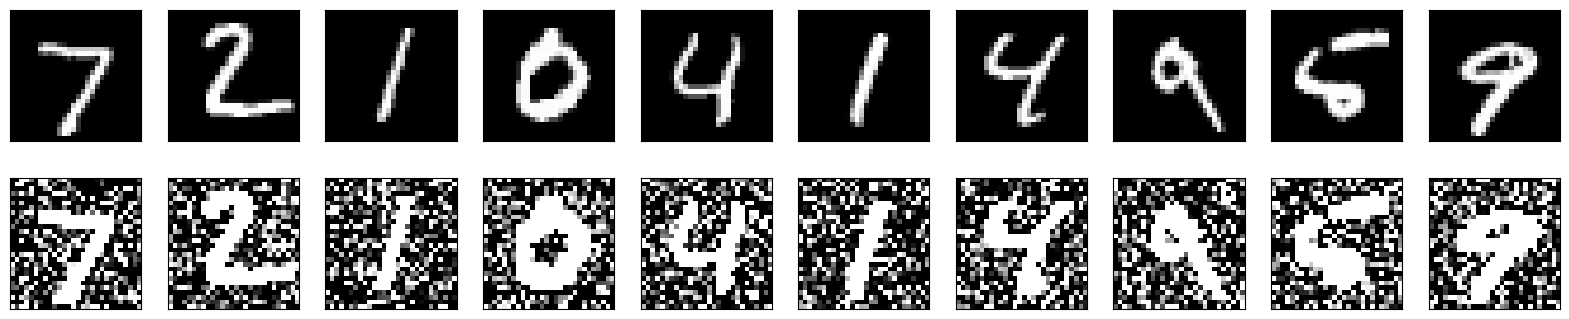

Epoch 1/10
375/375 [==============================] - 16s 33ms/step - loss: 0.2990 - accuracy: 0.9049 - val_loss: 0.1080 - val_accuracy: 0.9665
Epoch 2/10
375/375 [==============================] - 12s 31ms/step - loss: 0.0802 - accuracy: 0.9747 - val_loss: 0.0812 - val_accuracy: 0.9737
Epoch 3/10
375/375 [==============================] - 12s 31ms/step - loss: 0.0507 - accuracy: 0.9841 - val_loss: 0.0676 - val_accuracy: 0.9795
Epoch 4/10
375/375 [==============================] - 12s 31ms/step - loss: 0.0314 - accuracy: 0.9897 - val_loss: 0.0802 - val_accuracy: 0.9753
Epoch 5/10
375/375 [==============================] - 12s 32ms/step - loss: 0.0199 - accuracy: 0.9933 - val_loss: 0.0996 - val_accuracy: 0.9779
Epoch 6/10
375/375 [==============================] - 12s 32ms/step - loss: 0.0132 - accuracy: 0.9950 - val_loss: 0.1064 - val_accuracy: 0.9771
Epoch 7/10
375/375 [==============================] - 11s 30ms/step - loss: 0.0111 - accuracy: 0.9962 - val_loss: 0.0923 - val_accuracy:

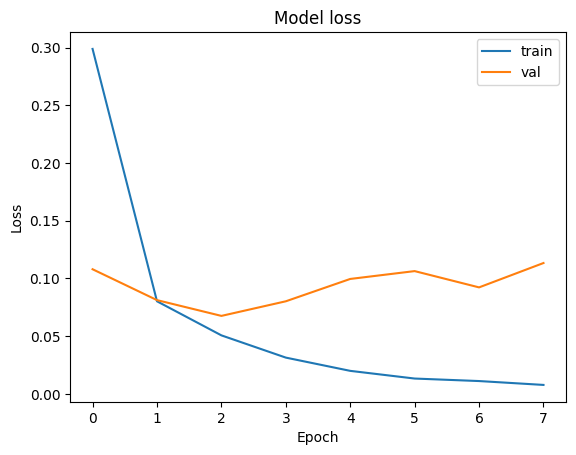

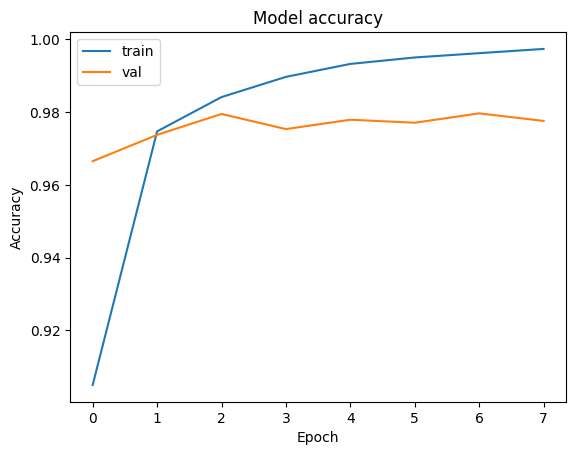

In [26]:
# Gaussian Noise -100% with Epochs = 10


import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Add 100% Gaussian noise to the images
noise_factor = 1.0
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# Display original and noisy images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(X_test_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the ResNet model
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
tensorboard = TensorBoard(log_dir='./logs')

# Train the model
history = model.fit(X_train_noisy.reshape((-1, 28, 28, 1)), y_train, epochs=10, batch_size=128, validation_split=0.2, callbacks=[early_stopping, tensorboard])

# Evaluate the model on the test set
y_pred = model.predict(X_test_noisy.reshape((-1, 28, 28, 1)))
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Print classification report, precision, recall and confusion matrix
print('Classification Report:\n', classification_report(y_test_classes, y_pred_classes))
print('Confusion Matrix:\n', confusion_matrix(y_test_classes, y_pred_classes))


# Plot the loss and accuracy curves
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

     